# Crawl Data

Trang web để crawl [ambitionbox.com/list-of-companies](https://www.ambitionbox.com/list-of-companies) ![Ambition Box](https://res.cloudinary.com/ichhoa129/image/upload/v1656378861/Screenshot_from_2022-06-28_08-11-19_alphs2.png "Ambition Box")

Xem thông tin chi tiết của từng công ty gồm có
- Name: tên
- Logo
- Company type: Loại công ty
- Headquarter: Địa chỉ trụ sở
- Age: Tuổi công ty
- TotalEmployeesIndia: Nhân viên ở Ấn Độ
- Industry: Lĩnh vực
- Rating: Đánh giá
- Reviews: Số lượng reviews
- Salaries: Tổng số lương
- Interviews: Số lượng phỏng vấn
- Jobs: Số công việc
- About: Mô tả

Để crawl dữ liệu ta có thể dùng beautifulsoup hoặc các công cụ khác. Nhưng ở đây có cách dễ hơn, làm theo các bước:
- Bật developer tool lên
- Bật qua tab network
- Bấm qua page 2
- Tìm ở danh sách api trang web gọi có api là *companyListingInfo* 

Thông tin api ở trong network tab ![Network tab](https://res.cloudinary.com/ichhoa129/image/upload/v1656379320/Screenshot_from_2022-06-28_08-21-50_mff6ml.png "Network tab")

Code crawl bằng javascript 

![Crawl code](https://res.cloudinary.com/ichhoa129/image/upload/v1656379607/Screenshot_from_2022-06-28_08-26-37_rkakwn.png "Crawl code")


Sau khi chạy sẽ thu đươc file db.json

# Xử lý và phân tích dữ liệu

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Chạy block bên dưới nếu chưa convert data từ json sang csv

In [174]:
# convert json to csv file
df = pd.read_json('./raw data/db.json')
df.to_csv('./raw data/raw data.csv', index=False)

In [175]:
df = pd.read_csv('./raw data/raw data.csv')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalEmployees            9158 non-null   object 
 1   TotalEmployeesIndia       8364 non-null   object 
 2   Rating                    9988 non-null   float64
 3   UrlName                   9988 non-null   object 
 4   CompanyType               8423 non-null   object 
 5   Name                      9988 non-null   object 
 6   CompanyReviewsLive        9988 non-null   int64  
 7   CompanySalaries           9988 non-null   int64  
 8   InterviewExperiencesLive  9988 non-null   int64  
 9   Age                       9988 non-null   int64  
 10  ShortName                 9988 non-null   object 
 11  Logo                      9639 non-null   object 
 12  HQCountry                 9625 non-null   object 
 13  headquaters               9673 non-null   object 
 14  CompanyJ

In [177]:
df.head(5)

,TotalEmployees,TotalEmployeesIndia,Rating,UrlName,CompanyType,Name,CompanyReviewsLive,CompanySalaries,InterviewExperiencesLive,Age,ShortName,Logo,HQCountry,headquaters,CompanyJobsLive,HQUrlName,CompanyId,location_count,industry_string,Subscribed
0,100001+,100001+,3.92,tcs,Public,Tata Consultancy Services,41589,394003,2783,54,TCS,tcs,India,"Mumbai,Maharashtra",55,mumbai,42,240,"BPO / Call Centre,IT Services & Consulting",0
1,100001+,100001+,4.14,accenture,Public,Accenture,27770,268685,2177,33,Accenture,accenture,Ireland,"Dublin,Dublin",7294,NaN,273,132,"IT Services & Consulting,Software Product",0
2,100001+,100001+,3.94,cognizant,Private,Cognizant,25176,272214,1748,28,Cognizant,cognizant-technology-solutions,United States (USA),"Teaneck,New Jersey",316,NaN,43,88,IT Services & Consulting,0
3,50001-100000,50001-100000,4.02,icici-bank,Public,ICICI Bank,32063,100049,940,28,ICICI Bank,icici_bank,India,"Mumbai,Maharashtra",150,mumbai,134,995,"Financial Services,Banking",0
4,100001+,100001+,3.93,wipro,Public,Wipro,23674,200635,1819,77,Wipro,wipro,India,"Bangalore/Bengaluru,Karnataka",520,bengaluru,44,254,IT Services & Consulting,0


## Kiểm tra dữ liệu trống ở các cột

<AxesSubplot:>

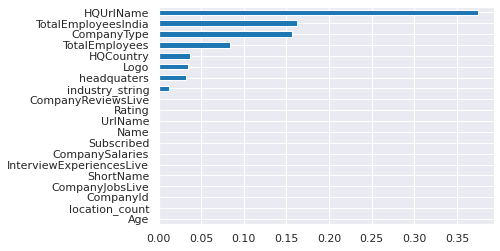

In [178]:
df.isna().mean().sort_values().plot(kind='barh', color='tab:blue')

- Các cột trống nhiều tuy nhiên không cần sử dụng tới chúng

In [179]:
df.TotalEmployees = df.TotalEmployees.replace({'100001+': 100001, '10000+': 10000, '94072': 94072})

df.TotalEmployees = df.TotalEmployees.replace({
    '50001-100000': int(np.floor((50001 + 100000) / 2)),
    '10001-50000': int(np.floor((10001 + 50000) / 2)),
    '5001-10000': int(np.floor((5001 + 10000) / 2)),
    '1001-5000': int(np.floor((1001 + 5000) / 2)),
    '501-1000': int(np.floor((501 + 1000) / 2)),
    '201-500': int(np.floor((201 + 500) / 2)),
    '51-200': int(np.floor((51 + 200) / 2)),
    '11-50': int(np.floor((11 + 50) / 2)),
    '1-10': int(np.floor((1 + 10) / 2)),
    })

df = df.dropna(subset=['TotalEmployees'])

df.TotalEmployeesIndia = df.TotalEmployeesIndia.replace({'100001+': 100001, '10000+': 10000, '94072': 94072})

df.TotalEmployeesIndia = df.TotalEmployeesIndia.replace({
    '50001-100000': int(np.floor((50001 + 100000) / 2)),
    '10001-50000': int(np.floor((10001 + 50000) / 2)),
    '5001-10000': int(np.floor((5001 + 10000) / 2)),
    '1001-5000': int(np.floor((1001 + 5000) / 2)),
    '501-1000': int(np.floor((501 + 1000) / 2)),
    '201-500': int(np.floor((201 + 500) / 2)),
    '51-200': int(np.floor((51 + 200) / 2)),
    '11-50': int(np.floor((11 + 50) / 2)),
    '1-10': int(np.floor((1 + 10) / 2)),
    })

df = df.dropna(subset=['TotalEmployeesIndia'])



## Top 20 công ty rating cao nhất

In [180]:
top20_company = df.sort_values(by='Rating', ascending=False)[:20]

Text(0, 0.5, 'Name')

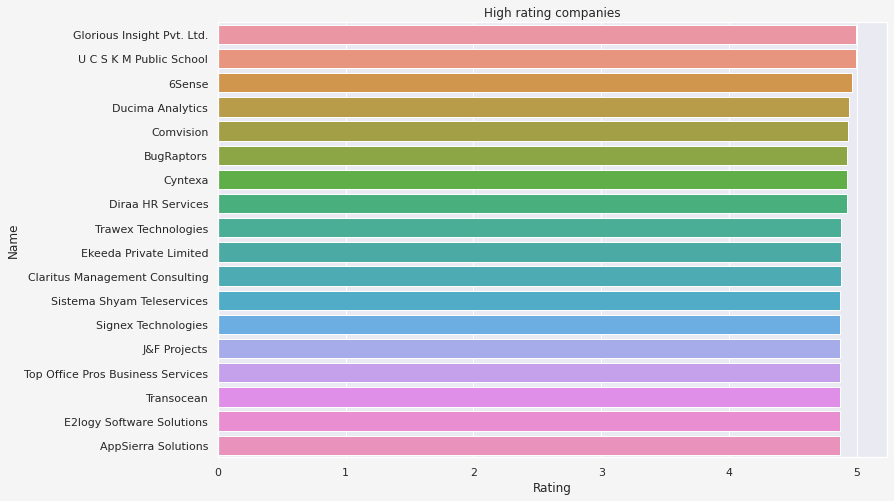

In [181]:

plt.rcParams['figure.facecolor']='whitesmoke'

topApply=df[['Name','Rating']].sort_values('Rating',ascending=False).head(20)

plt.figure(figsize=(12,8))
plt.rcParams['font.size']=20
sns.barplot(x='Rating',y='Name',data=topApply)
plt.title('High rating companies')
plt.xlabel('Rating')
plt.ylabel('Name')

- Rating của các công ty top chênh lệch không quá nhiều

## Phân bố Rating của các công ty

Text(0.5, 1.0, 'Distribution of ratings among companies')

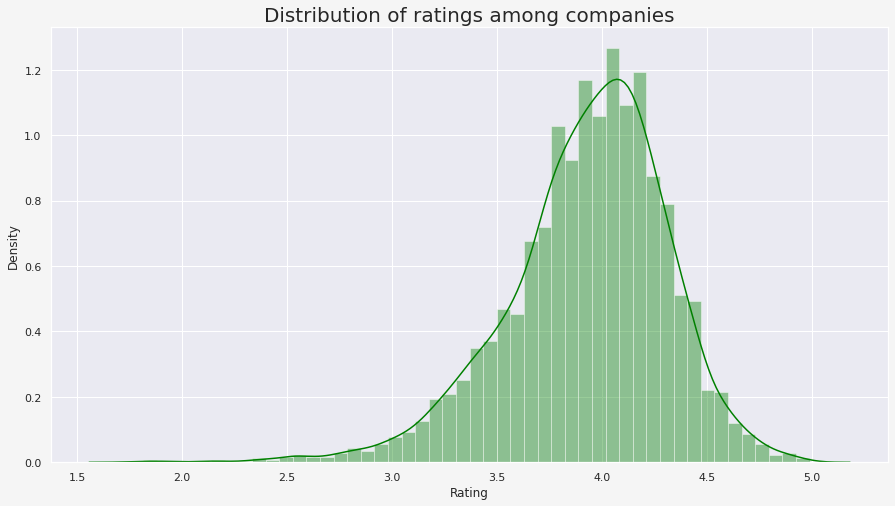

In [182]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df['Rating'], color="green")
plt.title("Distribution of ratings among companies", size = 20)

- Phân bố điểm rating của các công ty gần giống với phân bố chuẩn
- Phần lớn các công ty rating trong khoảng 3.7 tới 4.3

## Số lượng nhân viên ở các công ty

Text(0.5, 0.98, 'Frequency of employee in India')

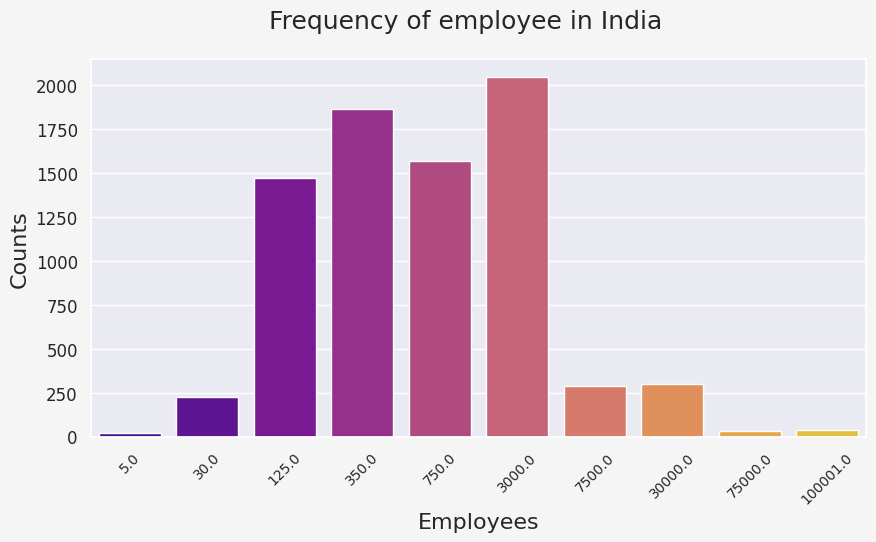

In [183]:
indiaEmployees = []

df['TotalEmployeesIndia'].apply(lambda x: indiaEmployees.append(x))
# remove nan value from totalEmployees
indiaEmployees = [x for x in indiaEmployees if str(x) != 'nan']

unique, counts = np.unique(indiaEmployees, return_counts=True)
te_dataframe = pd.DataFrame({"unique":unique,"counts":counts})
te_dataframe = te_dataframe.sort_values(['counts'],ascending=[False])

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
plt.xticks(size=10, rotation=45)
plt.yticks(size=12)
sns.set(style="darkgrid")
sns.barplot(data=te_dataframe[:20], x='unique', y='counts', palette='plasma')
ax.set_xlabel('Employees', fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
fig.suptitle('Frequency of employee in India',fontsize=18)

Text(0.5, 0.98, 'Frequency of employee in other')

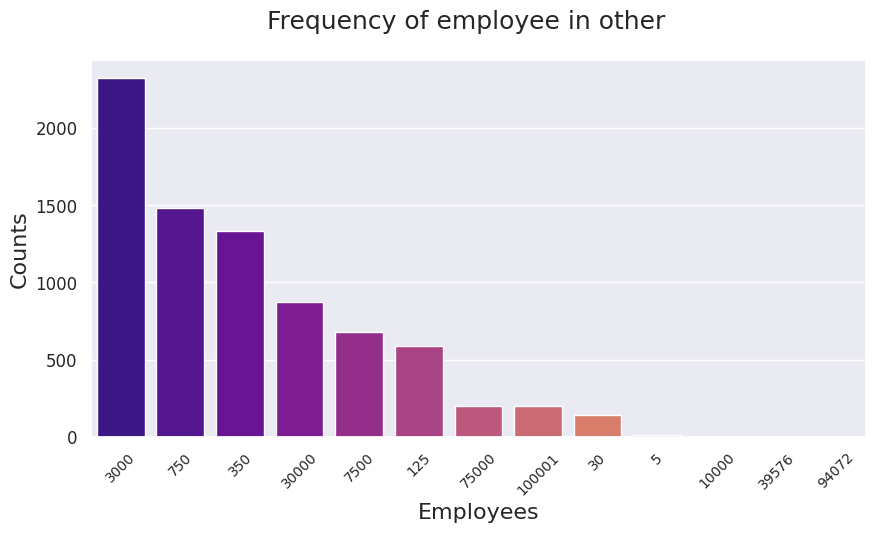

In [184]:
totalEmployees = []

df['TotalEmployees'].apply(lambda x: totalEmployees.append(x))

totalEmployees = [x for x in totalEmployees if str(x) != 'nan']

unique, counts = np.unique(totalEmployees, return_counts=True)
indiaEm_dataframe = pd.DataFrame({"unique":unique,"counts":counts})
indiaEm_dataframe = indiaEm_dataframe.sort_values(['counts'],ascending=[False])

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
plt.xticks(size=10, rotation=45)
plt.yticks(size=12)
sns.set(style="darkgrid")
sns.barplot(data=indiaEm_dataframe[:20], x='unique', y='counts', palette='plasma')
ax.set_xlabel('Employees', fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
fig.suptitle('Frequency of employee in other',fontsize=18)

- Phần lớn các công ty có số lượng nhân viên trong khoảng 1001 - 5000, 501- 1000, và 201 - 500 

## Top 20 công ty có lương cao

Text(0, 0.5, 'Name')

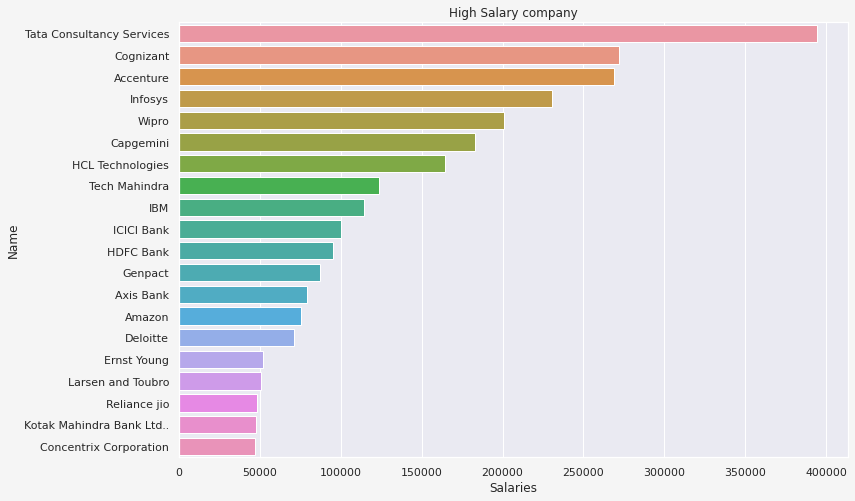

In [192]:
plt.rcParams['figure.facecolor']='whitesmoke'

topComSa=df[['Name','CompanySalaries']].sort_values('CompanySalaries',ascending=False).head(20)

plt.figure(figsize=(12,8))
plt.rcParams['font.size']=20
sns.barplot(x='CompanySalaries',y='Name',data=topComSa)
plt.title('High Salary companies')
plt.xlabel('Salaries')
plt.ylabel('Name')

- Lương của công ty TCS cao hơn nhiều so với các công ty còn lại: 407.5k
- Còn lại trong top 20 dao động từ 50k tới 270k

# Phân bố tuổi của các công ty

Text(0.5, 1.0, 'Distribution of Age of companies')

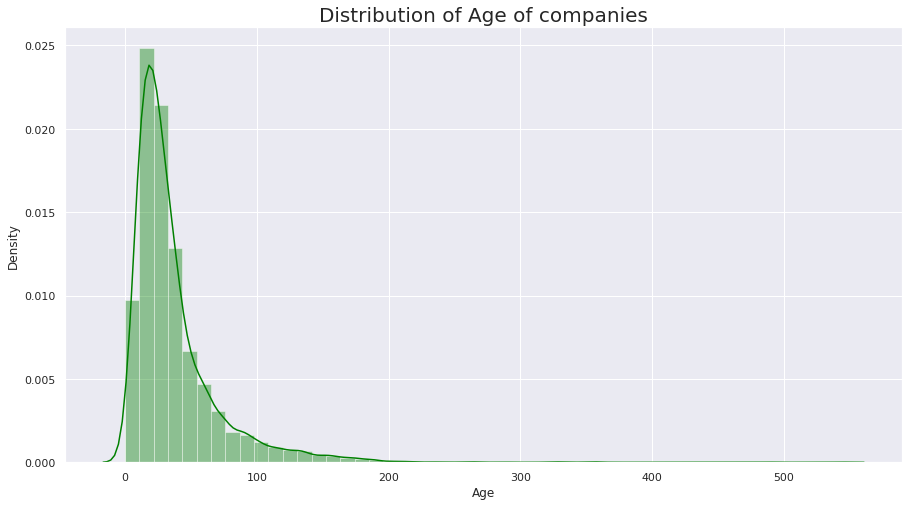

In [186]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df['Age'], color="green")
plt.title("Distribution of Age of companies", size = 20)

- Phần lớn các công ty có tuổi trong khoảng 20 30 năm
- Có một công ty có tuổi là 544 năm - *Oxford University Press*

## Độ tương quan giữa Rating với các đặc trưng khác

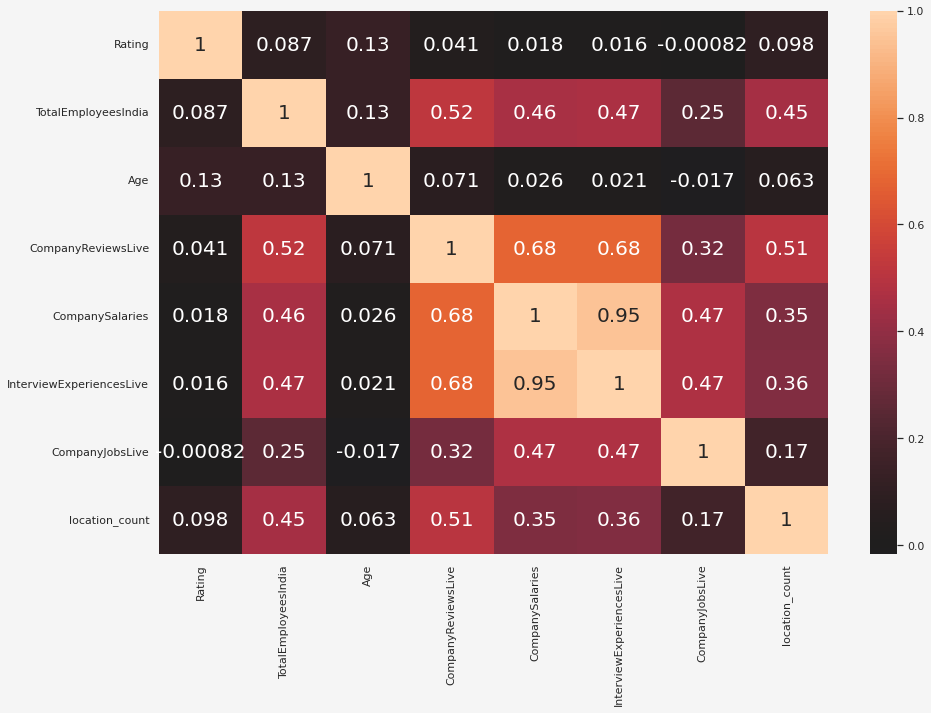

In [196]:
corr_matrix = df[['Rating', 'TotalEmployees', 'TotalEmployeesIndia', 
'Age', 'CompanyReviewsLive', 'CompanySalaries', 
'InterviewExperiencesLive', 'CompanyJobsLive', 'location_count']].corr()
plt.figure(figsize = (15,10))
sns_plot=sns.heatmap(corr_matrix,annot=True, center=0)
plt.show()


- Độ tương quan khá thấp
- Age có độ tương quan cao nhất so với Rating là 0.12